In [71]:
import os
import pandas as pd

In [72]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [75]:
# Read the CSV file
import io
uploaded_file = uploaded['data.csv']
df = pd.read_csv(io.StringIO(uploaded_file.decode("ISO-8859-1")))

In [76]:
df.head()

,author,media,title,category,content,isTodaysPaper,meta/createdBy/uid,meta/createdBy/name,meta/reach,meta/excerpt,meta/tags/0,meta/likes,meta/createdAt/_seconds,meta/createdAt/_nanoseconds,id,meta/tags/1,Summarize
0,BY Buddhika Samaraweera,https://firebasestorage.googleapis.com/v0/b/th...,Sufficient IVIG stocks available: Health Min.,news,In the wake of a batch of human intravenous i...,True,CIZLop1eNQgLt0ggozjxXC5H1Zm1,Wasantha Warnakulasuriya,0.0,In the wake of a batch of human intravenous im...,NaN,0.0,1.697481e+09,111000000.0,00HyHonQl7lhuOBp9nQT,NaN,The Ministry of Health in Sri Lanka has confir...
1,By Shenal Fernando,https://firebasestorage.googleapis.com/v0/b/th...,Licences to explore offshore petroleum blocks,business,Cabinet paper seeking approval for licences s...,True,3S7hjFYyt1Zgvl15YHH1GEuruUi2,Waruna Prabath,0.0,A Cabinet paper is slated to be presented to t...,NaN,0.0,1.687632e+09,908000000.0,00Qa5lHhgIJXDGUQYupU,NaN,A Cabinet paper is set to be presented to the ...
2,NaN,https://firebasestorage.googleapis.com/v0/b/th...,Female body recovered from Bogambara waters,news,The body of a female was recovered from the ...,True,CIZLop1eNQgLt0ggozjxXC5H1Zm1,Wasantha Warnakulasuriya,0.0,The body of a female was recovered from the Bo...,NaN,0.0,1.687373e+09,339000000.0,00qSPSjAzZtcrigZMLnI,NaN,Police recovered a 31-year-old mother-of-two's...
3,BY Dr. Jehan Perera,https://firebasestorage.googleapis.com/v0/b/th...,Protect the Judiciary to protect democracy,opinion,The Government has allocated Rs. 11 billion i...,True,3S7hjFYyt1Zgvl15YHH1GEuruUi2,Waruna Prabath,0.0,The Government has allocated Rs. 11 billion in...,NaN,0.0,1.696878e+09,30000000.0,012pBfM0PLjZ7kkrfxdW,NaN,The Sri Lankan government has allocated Rs. 11...
4,BY Ruwan Laknath Jayakody,https://firebasestorage.googleapis.com/v0/b/th...,Care-related needs of SLâs ageing population...,focus,The inter-disciplinary and inter-sectoral col...,True,3S7hjFYyt1Zgvl15YHH1GEuruUi2,Waruna Prabath,0.0,The inter-disciplinary and inter-sectoral coll...,NaN,0.0,1.695323e+09,0.0,01JA8b60c9Fhr1GVljVd,NaN,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   author                       136 non-null    object 
 1   media                        217 non-null    object 
 2   title                        990 non-null    object 
 3   category                     992 non-null    object 
 4   content                      962 non-null    object 
 5   isTodaysPaper                216 non-null    object 
 6   meta/createdBy/uid           992 non-null    object 
 7   meta/createdBy/name          992 non-null    object 
 8   meta/reach                   992 non-null    float64
 9   meta/excerpt                 990 non-null    object 
 10  meta/tags/0                  804 non-null    object 
 11  meta/likes                   992 non-null    float64
 12  meta/createdAt/_seconds      992 non-null    float64
 13  meta/createdAt/_nano

In [78]:
df.drop(['isTodaysPaper'], axis = 1, inplace=True)
df.drop(['media'], axis = 1, inplace=True)
df.drop(['meta/createdBy/uid'], axis = 1, inplace=True)
df.drop(['meta/createdBy/name'], axis = 1, inplace=True)
df.drop(['meta/reach'], axis = 1, inplace=True)
df.drop(['meta/excerpt'], axis = 1, inplace=True)
df.drop(['meta/tags/0'], axis = 1, inplace=True)
df.drop(['meta/likes'], axis = 1, inplace=True)
df.drop(['meta/createdAt/_seconds'], axis = 1, inplace=True)
df.drop(['meta/createdAt/_nanoseconds'], axis = 1, inplace=True)
df.drop(['meta/tags/1'], axis = 1, inplace=True)

In [83]:
df.head()

,author,title,category,content,id,Summarize
0,BY Buddhika Samaraweera,Sufficient IVIG stocks available: Health Min.,news,In the wake of a batch of human intravenous i...,00HyHonQl7lhuOBp9nQT,The Ministry of Health in Sri Lanka has confir...
1,By Shenal Fernando,Licences to explore offshore petroleum blocks,business,Cabinet paper seeking approval for licences s...,00Qa5lHhgIJXDGUQYupU,A Cabinet paper is set to be presented to the ...
2,NaN,Female body recovered from Bogambara waters,news,The body of a female was recovered from the ...,00qSPSjAzZtcrigZMLnI,Police recovered a 31-year-old mother-of-two's...
3,BY Dr. Jehan Perera,Protect the Judiciary to protect democracy,opinion,The Government has allocated Rs. 11 billion i...,012pBfM0PLjZ7kkrfxdW,The Sri Lankan government has allocated Rs. 11...
4,BY Ruwan Laknath Jayakody,Care-related needs of SLâs ageing population...,focus,The inter-disciplinary and inter-sectoral col...,01JA8b60c9Fhr1GVljVd,NaN


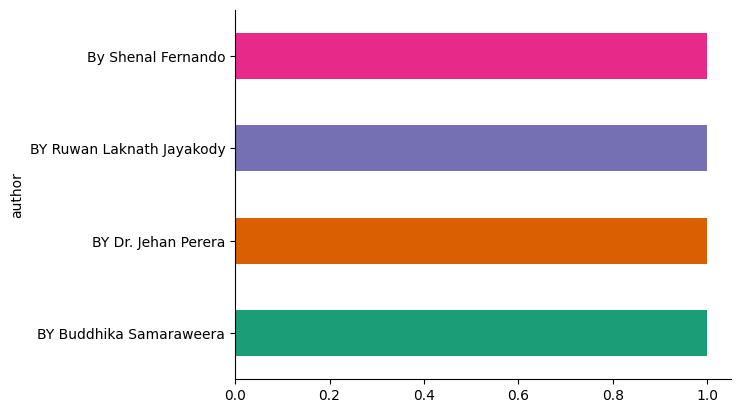

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('author').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [84]:
df.isnull().sum()

author       858
title          4
category       2
content       32
id             2
Summarize    898
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

author       0
title        0
category     0
content      0
id           0
Summarize    0
dtype: int64

In [88]:
df['category'].value_counts()

news          30
sports         8
opinion        6
business       5
focus          3
brunch         1
interviews     1
happinez       1
Name: category, dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


In [91]:
df['content'][0]

' In the wake of a batch of human intravenous immunoglobulin (IVIG) imported to Sri Lanka from India being suspended from use, the Ministry of Health stated that there are adequate stocks of the said drug at hospitals in the country.   Earlier this month (October), the National Medicines Regulatory Authority (NMRA) issued a press release stating that a batch of IVIG imported to Sri Lanka from India in violation of the due procedure had been suspended from use.   With the suspension of the IVIG batch from use,   The Daily Morning   queried the Ministry as to whether there are sufficient stocks of the said drug to be administered to patients at hospitals. In response, the Ministry\'s Additional Secretary Dr. Saman Rathnayake said: "There are two other companies that imported this drug. The suspended batch is a small quantity. By now, the supplies from the other two companies have arrived, and there are sufficient stocks."   IVIG is a therapy treatment for patients with antibody deficienc

In [92]:
df['content'][1]

' Cabinet paper seeking approval for licences soon   Licences for 150 offshore blocks in Mannar, Cauvery Basins        A Cabinet paper is slated to be presented to the Cabinet of Ministers, seeking approval for the granting of exploration licences to interested foreign firms for up to 150 offshore blocks in the Mannar, Cauvery, and Lanka Basins, marking the countryâ\x80\x99s inaugural foray into petroleum exploration.   Speaking to   The Sunday Morning Business,   Petroleum Development Authority of Sri Lanka (PDASL) Chairman Saliya Wickramasuriya stated that the Ministry of Energy would be presenting the Cabinet paper for the granting of petroleum exploration licences in the Mannar, Cauvery, and Lanka Basins.   Elaborating further, he stated: â\x80\x9cThere has been significant interest. We have received Expressions of Interest (EOIs) in relation to around 150 offshore blocks in the Mannar and Cauvery Basins, from a total of around 890 blocks.â\x80\x9d   He noted that the regulations s

**Preprocessing**

**TOKENIZATION**

what is tokenization

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types 1.word, 2.character, and 3.subword (n-gram characters) tokenization.

In [93]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['content']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]

# Above I have used list comprehension technique instead of conventional for loop method.

**WORD EMBEDDING**

spliting the sentecnec into words

In [94]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-11-05 09:21:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-05 09:21:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-05 09:21:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [95]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [96]:
len(word_embeddings)

400000

**Remove punctuations, special characters and numbers**

In [97]:
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

<ipython-input-97-0e9472bb392f>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [98]:
print(clean_sentences[0])
print(clean_sentences[1])
print(clean_sentences[2])

 In the wake of a batch of human intravenous immunoglobulin  IVIG  imported to Sri Lanka from India being suspended from use  the Ministry of Health stated that there are adequate stocks of the said drug at hospitals in the country 
Earlier this month  October   the National Medicines Regulatory Authority  NMRA  issued a press release stating that a batch of IVIG imported to Sri Lanka from India in violation of the due procedure had been suspended from use 
With the suspension of the IVIG batch from use    The Daily Morning   queried the Ministry as to whether there are sufficient stocks of the said drug to be administered to patients at hospitals 


*converting to lower case*

In [99]:
clean_sentences = [s.lower() for s in clean_sentences]

Removing stops words

In [100]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [102]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [103]:
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [104]:
clean_sentences[0:5]

['wake batch human intravenous immunoglobulin ivig imported sri lanka india suspended use ministry health stated adequate stocks said drug hospitals country',
 'earlier month october national medicines regulatory authority nmra issued press release stating batch ivig imported sri lanka india violation due procedure suspended use',
 'suspension ivig batch use daily morning queried ministry whether sufficient stocks said drug administered patients hospitals',
 'response ministry additional secretary dr saman rathnayake said two companies imported drug',
 'suspended batch small quantity']

**Vector representation of sentences**

In [105]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [106]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

**Similarity matrix**

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [108]:
similarity_matrix = np.zeros([len(sentences), len(sentences)])
# The above code will help me in forming the matrix of the size of sentences.

In [109]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [110]:
print(similarity_matrix.shape)

(1369, 1369)


**Converting similarity matrix sim_mat into a graph**

In [111]:
import networkx as nx

nx_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(nx_graph)

**Summarization**

In [112]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [116]:
# Extract top 10 News as the summary
for i in range(1):
  print(ranked_sentences[i][1])

With regard to financial stability, Dr. Dissanayake added: âInstead of continuing to depend on the Treasury, especially in the current state of the country, the Tower Hall Theatre Foundation is planning to look for ways to earn adequate revenue in order to sustain itself within the coming two to three years.â   Meanwhile, both Prof. Wickramasinghe and Dr. Dissanayake spoke of education on stage drama and the theatrical arts in the education system.
